In [107]:
import getdata
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter


In [108]:
#Checking CSV dataframe and structure.
getdata.netflix_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [122]:
# Check Data for nulls and see if there are any duplicate show ID's

print(getdata.netflix_df.info())
getdata.netflix_df[getdata.netflix_df.duplicated(subset="id")]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


In [110]:
# Create new dataframe for only show types and relevant info & Clean Data

show_type_df = getdata.netflix_df[['title',
 'type',
 'runtime',
 'seasons',
 'imdb_score',
 'imdb_votes',
 'tmdb_popularity',
 'tmdb_score']].copy()

# Data Cleaning
# Remove null row for Title.  Replace NaN for age_certification to Not Rated.  Then retest
show_type_df.dropna(subset="title",inplace=True)
show_type_df = show_type_df.fillna({"age_certification": "Not Rated"})

show_type_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5849 entries, 0 to 5849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            5849 non-null   object 
 1   type             5849 non-null   object 
 2   runtime          5849 non-null   int64  
 3   seasons          2106 non-null   float64
 4   imdb_score       5368 non-null   float64
 5   imdb_votes       5352 non-null   float64
 6   tmdb_popularity  5759 non-null   float64
 7   tmdb_score       5539 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 411.3+ KB


In [111]:
# Show structure of dataframe
show_type_df.head()

,title,type,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Five Came Back: The Reference Films,SHOW,51,1.0,NaN,NaN,0.600,NaN
1,Taxi Driver,MOVIE,114,NaN,8.2,808582.0,40.965,8.179
2,Deliverance,MOVIE,109,NaN,7.7,107673.0,10.010,7.300
3,Monty Python and the Holy Grail,MOVIE,91,NaN,8.2,534486.0,15.461,7.811
4,The Dirty Dozen,MOVIE,150,NaN,7.7,72662.0,20.398,7.600


    type  title
0  MOVIE   3743
1   SHOW   2106


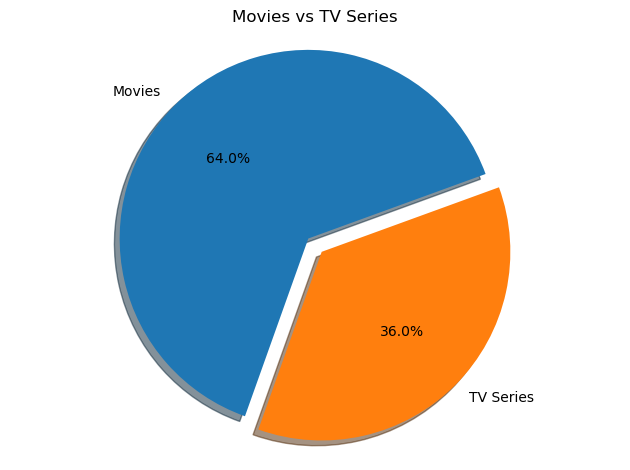

In [112]:
# Pie Chart - movies vs show
movie_show_df = pd.DataFrame(show_type_df.groupby(["type"])["title"].count()).reset_index()
print(movie_show_df.head())

plt.pie(movie_show_df['title'], labels=["Movies", "TV Series"], autopct="%1.1f%%", startangle=20, explode = (0, .1), shadow=True)
plt.axis("equal")
plt.title("Movies vs TV Series")
plt.tight_layout()

plt.show()

In [113]:
# New dataframes that separate movies and shows for individual analysis, removing extra columns that are not applicable.

movies_df = show_type_df.loc[show_type_df["type"] == "MOVIE", :]
movies_df = movies_df.drop(columns=["type", "seasons"])

shows_df = show_type_df.loc[show_type_df["type"] == "SHOW", :]
shows_df = shows_df.drop(columns=["type"])
movies_df.head()



,title,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,Taxi Driver,114,8.2,808582.0,40.965,8.179
2,Deliverance,109,7.7,107673.0,10.010,7.300
3,Monty Python and the Holy Grail,91,8.2,534486.0,15.461,7.811
4,The Dirty Dozen,150,7.7,72662.0,20.398,7.600
6,Life of Brian,94,8.0,395024.0,17.770,7.800


In [114]:
shows_df.head()

,title,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Five Came Back: The Reference Films,51,1.0,NaN,NaN,0.600,NaN
5,Monty Python's Flying Circus,30,4.0,8.8,73424.0,17.617,8.306
26,Monty Python's Fliegender Zirkus,43,1.0,8.1,2151.0,1.487,7.000
35,Seinfeld,24,9.0,8.9,308824.0,130.213,8.301
44,Knight Rider,51,4.0,6.9,34115.0,50.267,7.500


In [115]:
# # Movie Ratings
# movies_imdb = movies_df.dropna(subset="imdb_votes")
# shows_imdb = shows_df.dropna(subset="imdb_votes")

# # print(movies_df.info())
# print(movies_imdb.info())
# print(shows_imdb.info())


<class 'pandas.core.frame.DataFrame'>
Index: 3413 entries, 1 to 5847
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3413 non-null   object 
 1   runtime          3413 non-null   int64  
 2   imdb_score       3413 non-null   float64
 3   imdb_votes       3413 non-null   float64
 4   tmdb_popularity  3365 non-null   float64
 5   tmdb_score       3271 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 186.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1939 entries, 5 to 5849
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1939 non-null   object 
 1   runtime          1939 non-null   int64  
 2   seasons          1939 non-null   float64
 3   imdb_score       1939 non-null   float64
 4   imdb_votes       1939 non-null   float64
 5   tmdb_popularity  1914 non-null   f

In [125]:
# IMDB Votes - Find a bottom threshold when trying to figure out which scores to take.  We want them statistically significant. 

print(" ===  Movies:  IMDB Votes  ===")
print(movies_df["imdb_votes"].describe())
print("")
print(" ===  Shows:  IMDB Votes  ===")
print(movies_df["imdb_votes"].describe())



 ===  Movies:  IMDB Votes  ===
count    3.413000e+03
mean     2.690938e+04
std      1.068378e+05
min      5.000000e+00
25%      5.600000e+02
50%      2.591000e+03
75%      1.154500e+04
max      2.294231e+06
Name: imdb_votes, dtype: float64

 ===  Shows:  IMDB Votes  ===
count    3.413000e+03
mean     2.690938e+04
std      1.068378e+05
min      5.000000e+00
25%      5.600000e+02
50%      2.591000e+03
75%      1.154500e+04
max      2.294231e+06
Name: imdb_votes, dtype: float64


In [117]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = movies_imdb_votes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile is: 560.0
The upper quartile is: 11545.0
The interquartile range is: 10985.0
The the median is: 2591.0 
Values below -15917.5 could be outliers.
Values above 28022.5 could be outliers.


## IMDB Ratings & TMDB
I wanted to set the scale on the Y axis to %

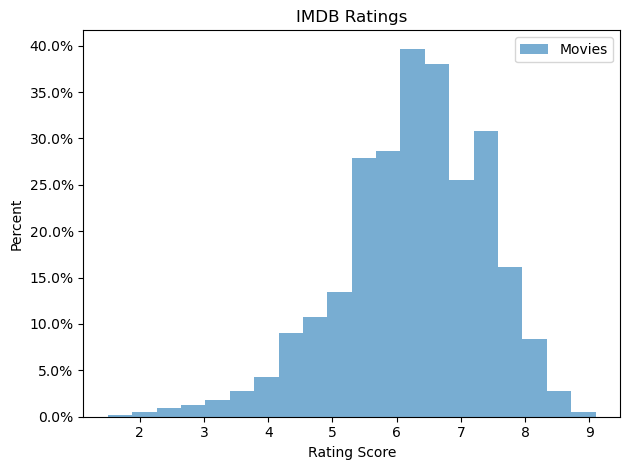

 ===  Movies:  IMDB  ===
count    1939.000000
mean        6.977927
std         1.077401
min         2.000000
25%         6.400000
50%         7.100000
75%         7.700000
max         9.600000
Name: imdb_score, dtype: float64
 ===  Shows:  IMDB  ===
count    1939.000000
mean        6.977927
std         1.077401
min         2.000000
25%         6.400000
50%         7.100000
75%         7.700000
max         9.600000
Name: imdb_score, dtype: float64


In [127]:

# Set up the figure and axes
fig, ax = plt.subplots()
bins=20

plt.hist(movies_df["imdb_score"],alpha=.6, label="Movies", density=True, bins=bins)
# plt.hist(shows_df["imdb_score"],alpha=.6, label="Shows", density=True, bins=bins)

# Formatting Chart

plt.title("IMDB Ratings")
plt.xlabel("Rating Score")
plt.ylabel("Percent")
ax.yaxis.set_major_formatter(PercentFormatter(1))  # Set Y-axis ticks as percentages
plt.legend()
plt.tight_layout()

plt.show()



print(" ===  Movies:  IMDB  ===")
print(shows_df["imdb_score"].describe())

print(" ===  Shows:  IMDB  ===")
print(shows_df["imdb_score"].describe())